In [1]:
%run function_and_library.ipynb

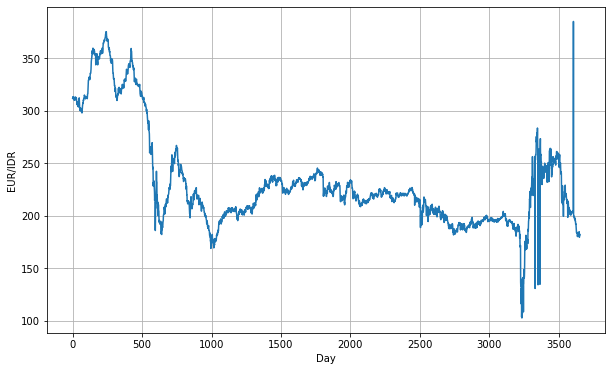

In [4]:
# Initialize lists
time_step = []
sunspots = []

# Open CSV file
with open('./currency_data_10_years.csv') as csvfile:
  
    # Initialize reader
    reader = csv.reader(csvfile, delimiter=',')

    # Skip the first line
    next(reader)

    # Append row and sunspot number to lists
    for i,row in enumerate(reader):
        time_step.append(int(i))
        sunspots.append(float(row[10]))

# Convert lists to numpy arrays
time = np.array(time_step)
series = np.array(sunspots)

# Preview the data
plot_series(time, series, xlabel='Day', ylabel='EUR/IDR')

In [3]:
split_time = 3000

x_train = series[:split_time]
time_train = time[:split_time]

x_valid = series[split_time:]
time_valid = time[split_time:]

window_size = 30
batch_size = 128
shuffle_buffer_size = 1000

train_set = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)
valid_set = windowed_dataset(x_valid, window_size, batch_size, shuffle_buffer_size)

6/6 [==============================] - 0s 22ms/step


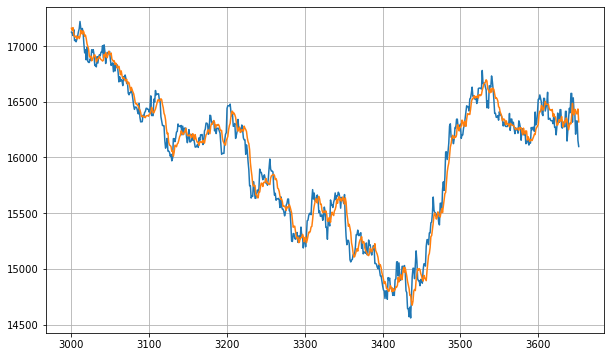

{'mae': 83.13104, 'mse': 11340.779, 'rmse': 106.493095, 'mape': 0.52333164, 'mase': 1.6063454}


In [9]:
# Load in best performing model
model_2 = tf.keras.models.load_model("model_experiments/model_2/")
model_2.evaluate(valid_set)

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_2, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_2 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_2))

eval_model_2 = evaluate_preds(y_true=x_valid,
                               y_pred=results_2)
print(eval_model_2)

Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               7936      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 1)                 33        
                                                                 
Total params: 51,201
Trainable params: 51,201
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     16/Unknown - 2s 23ms/step - loss: 223

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 7s 229ms/step - loss: 1773.8593 - mae: 1774.3593 - val_loss: 991.3719 - val_mae: 991.8719
Epoch 2/100
20/24 [========================>.....] - ETA: 0s - loss: 492.4954 - mae: 492.9954

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 81ms/step - loss: 463.0106 - mae: 463.5105 - val_loss: 285.0996 - val_mae: 285.5993
Epoch 3/100
21/24 [=========================>....] - ETA: 0s - loss: 230.1884 - mae: 230.6877

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 78ms/step - loss: 225.6795 - mae: 226.1787 - val_loss: 142.3918 - val_mae: 142.8914
Epoch 4/100
24/24 [==============================] - 1s 24ms/step - loss: 201.6704 - mae: 202.1701 - val_loss: 149.4000 - val_mae: 149.8995
Epoch 5/100
24/24 [==============================] - 1s 22ms/step - loss: 183.1988 - mae: 183.6981 - val_loss: 148.6068 - val_mae: 149.1067
Epoch 6/100
15/24 [=================>............] - ETA: 0s - loss: 207.9800 - mae: 208.4794

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 85ms/step - loss: 206.8885 - mae: 207.3879 - val_loss: 135.9645 - val_mae: 136.4639
Epoch 7/100
24/24 [==============================] - 1s 27ms/step - loss: 239.6436 - mae: 240.1434 - val_loss: 292.0649 - val_mae: 292.5649
Epoch 8/100
24/24 [==============================] - 1s 23ms/step - loss: 189.9742 - mae: 190.4733 - val_loss: 298.0694 - val_mae: 298.5694
Epoch 9/100
24/24 [==============================] - 1s 34ms/step - loss: 255.4958 - mae: 255.9955 - val_loss: 143.9118 - val_mae: 144.4109
Epoch 10/100
24/24 [==============================] - 1s 26ms/step - loss: 188.1653 - mae: 188.6647 - val_loss: 182.9552 - val_mae: 183.4542
Epoch 11/100
24/24 [==============================] - 1s 22ms/step - loss: 186.2979 - mae: 186.7970 - val_loss: 146.6922 - val_mae: 147.1922
Epoch 12/100
24/24 [==============================] - 1s 23ms/step - loss: 190.6974 - mae: 191.1968 - val_loss: 137.9951 - val_mae: 138.4933
Epoch 13/100
15/24 [=========

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 99ms/step - loss: 189.1764 - mae: 189.6761 - val_loss: 122.1373 - val_mae: 122.6352
Epoch 14/100
24/24 [==============================] - 1s 27ms/step - loss: 170.7635 - mae: 171.2626 - val_loss: 149.7530 - val_mae: 150.2528
Epoch 15/100
24/24 [==============================] - 1s 28ms/step - loss: 195.1468 - mae: 195.6465 - val_loss: 166.3001 - val_mae: 166.7994
Epoch 16/100
19/24 [======================>.......] - ETA: 0s - loss: 164.2777 - mae: 164.7768

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 78ms/step - loss: 164.9807 - mae: 165.4796 - val_loss: 114.8091 - val_mae: 115.3081
Epoch 17/100
24/24 [==============================] - 1s 24ms/step - loss: 161.1284 - mae: 161.6277 - val_loss: 143.3086 - val_mae: 143.8081
Epoch 18/100
24/24 [==============================] - 1s 21ms/step - loss: 210.3516 - mae: 210.8512 - val_loss: 180.1709 - val_mae: 180.6709
Epoch 19/100
24/24 [==============================] - 1s 24ms/step - loss: 311.0797 - mae: 311.5792 - val_loss: 135.2728 - val_mae: 135.7708
Epoch 20/100
24/24 [==============================] - 1s 30ms/step - loss: 275.7718 - mae: 276.2717 - val_loss: 217.6118 - val_mae: 218.1118
Epoch 21/100
24/24 [==============================] - 1s 24ms/step - loss: 221.7003 - mae: 222.2000 - val_loss: 283.2533 - val_mae: 283.7531
Epoch 22/100
24/24 [==============================] - 1s 23ms/step - loss: 257.3192 - mae: 257.8188 - val_loss: 126.8430 - val_mae: 127.3426
Epoch 23/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 85ms/step - loss: 138.2111 - mae: 138.7104 - val_loss: 105.3090 - val_mae: 105.8080
Epoch 30/100
24/24 [==============================] - 1s 26ms/step - loss: 141.2332 - mae: 141.7324 - val_loss: 119.9349 - val_mae: 120.4334
Epoch 31/100
24/24 [==============================] - 1s 22ms/step - loss: 142.4589 - mae: 142.9585 - val_loss: 200.4802 - val_mae: 200.9801
Epoch 32/100
24/24 [==============================] - 1s 25ms/step - loss: 165.4477 - mae: 165.9472 - val_loss: 200.8677 - val_mae: 201.3674
Epoch 33/100
15/24 [=================>............] - ETA: 0s - loss: 165.9004 - mae: 166.3999

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 91ms/step - loss: 165.3532 - mae: 165.8528 - val_loss: 100.8490 - val_mae: 101.3471
Epoch 34/100
24/24 [==============================] - 1s 26ms/step - loss: 144.7263 - mae: 145.2254 - val_loss: 193.3755 - val_mae: 193.8741
Epoch 35/100
24/24 [==============================] - 1s 26ms/step - loss: 162.9589 - mae: 163.4580 - val_loss: 112.9290 - val_mae: 113.4280
Epoch 36/100
24/24 [==============================] - 1s 23ms/step - loss: 145.8801 - mae: 146.3792 - val_loss: 282.0546 - val_mae: 282.5546
Epoch 37/100
24/24 [==============================] - 1s 22ms/step - loss: 276.5801 - mae: 277.0800 - val_loss: 177.8806 - val_mae: 178.3799
Epoch 38/100
24/24 [==============================] - 1s 24ms/step - loss: 249.2612 - mae: 249.7610 - val_loss: 146.0709 - val_mae: 146.5703
Epoch 39/100
24/24 [==============================] - 1s 21ms/step - loss: 198.9949 - mae: 199.4946 - val_loss: 177.9061 - val_mae: 178.4047
Epoch 40/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 86ms/step - loss: 142.4914 - mae: 142.9903 - val_loss: 96.9872 - val_mae: 97.4868
Epoch 47/100
24/24 [==============================] - 1s 24ms/step - loss: 162.8935 - mae: 163.3931 - val_loss: 179.8584 - val_mae: 180.3583
Epoch 48/100
24/24 [==============================] - 1s 22ms/step - loss: 238.0558 - mae: 238.5555 - val_loss: 280.6864 - val_mae: 281.1864
Epoch 49/100
24/24 [==============================] - 1s 21ms/step - loss: 152.4845 - mae: 152.9836 - val_loss: 129.6606 - val_mae: 130.1602
Epoch 50/100
24/24 [==============================] - 1s 23ms/step - loss: 132.2130 - mae: 132.7121 - val_loss: 99.1891 - val_mae: 99.6886
Epoch 51/100
24/24 [==============================] - 1s 22ms/step - loss: 137.6910 - mae: 138.1902 - val_loss: 101.0730 - val_mae: 101.5720
Epoch 52/100
24/24 [==============================] - 1s 26ms/step - loss: 126.5460 - mae: 127.0450 - val_loss: 146.6450 - val_mae: 147.1450
Epoch 53/100
24/24 [==========

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 67ms/step - loss: 142.9957 - mae: 143.4951 - val_loss: 91.2157 - val_mae: 91.7131
Epoch 91/100
24/24 [==============================] - 1s 22ms/step - loss: 109.9691 - mae: 110.4670 - val_loss: 157.9243 - val_mae: 158.4234
Epoch 92/100
24/24 [==============================] - 1s 22ms/step - loss: 187.6442 - mae: 188.1439 - val_loss: 93.6166 - val_mae: 94.1166
Epoch 93/100
24/24 [==============================] - 1s 20ms/step - loss: 182.0686 - mae: 182.5682 - val_loss: 108.4191 - val_mae: 108.9189
Epoch 94/100
24/24 [==============================] - 1s 23ms/step - loss: 146.1106 - mae: 146.6093 - val_loss: 98.5460 - val_mae: 99.0446
Epoch 95/100
24/24 [==============================] - 1s 22ms/step - loss: 118.5011 - mae: 119.0002 - val_loss: 106.8667 - val_mae: 107.3656
Epoch 96/100
17/24 [====================>.........] - ETA: 0s - loss: 114.7574 - mae: 115.2562

INFO:tensorflow:Assets written to: model_experiments\model_21\assets


INFO:tensorflow:Assets written to: model_experiments\model_21\assets


24/24 [==============================] - 2s 77ms/step - loss: 117.3046 - mae: 117.8034 - val_loss: 90.7056 - val_mae: 91.2026
Epoch 97/100
24/24 [==============================] - 1s 23ms/step - loss: 188.7546 - mae: 189.2540 - val_loss: 249.9415 - val_mae: 250.4415
Epoch 98/100
24/24 [==============================] - 1s 21ms/step - loss: 128.0688 - mae: 128.5679 - val_loss: 92.3870 - val_mae: 92.8859
Epoch 99/100
24/24 [==============================] - 1s 24ms/step - loss: 121.2857 - mae: 121.7849 - val_loss: 179.2119 - val_mae: 179.7118
Epoch 100/100
6/6 [==============================] - 1s 84ms/step


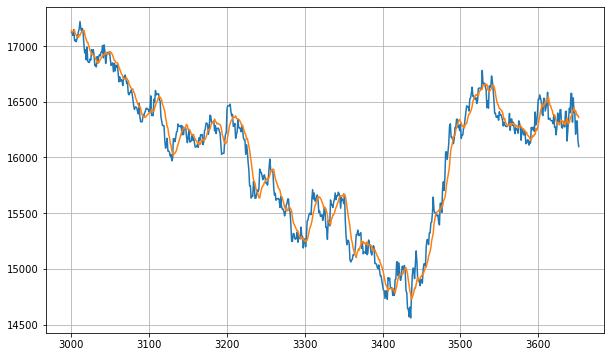

{'mae': 90.07259, 'mse': 13165.736, 'rmse': 114.74204, 'mape': 0.567024, 'mase': 1.7404774}


In [4]:
model_21 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_21")

# Get initial weights
init_weights = model_21.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_21.set_weights(init_weights)

model_21.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_21.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_21 = model_21.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_21.name)])

# Load in best performing model
model_21 = tf.keras.models.load_model("model_experiments/model_21/")
model_21.evaluate(valid_set)

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_21, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_21 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_21))

eval_model_21 = evaluate_preds(y_true=x_valid,
                               y_pred=results_21)
print(eval_model_21)

Model: "model_22"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                 33 

INFO:tensorflow:Assets written to: model_experiments\model_22\assets


INFO:tensorflow:Assets written to: model_experiments\model_22\assets


24/24 [==============================] - 4s 99ms/step - loss: 8749.4902 - mae: 8749.9902 - val_loss: 3349.4802 - val_mae: 3349.9802
Epoch 2/100
16/24 [===================>..........] - ETA: 0s - loss: 4162.1753 - mae: 4162.6753

INFO:tensorflow:Assets written to: model_experiments\model_22\assets


INFO:tensorflow:Assets written to: model_experiments\model_22\assets


24/24 [==============================] - 2s 80ms/step - loss: 4018.0962 - mae: 4018.5962 - val_loss: 2915.9751 - val_mae: 2916.4751
Epoch 3/100
20/24 [========================>.....] - ETA: 0s - loss: 3536.1118 - mae: 3536.6118

INFO:tensorflow:Assets written to: model_experiments\model_22\assets


INFO:tensorflow:Assets written to: model_experiments\model_22\assets


24/24 [==============================] - 3s 99ms/step - loss: 3571.0557 - mae: 3571.5557 - val_loss: 2358.5994 - val_mae: 2359.0994
Epoch 4/100
24/24 [==============================] - 1s 24ms/step - loss: 3324.5852 - mae: 3325.0852 - val_loss: 3463.7063 - val_mae: 3464.2063
Epoch 5/100
20/24 [========================>.....] - ETA: 0s - loss: 2990.9790 - mae: 2991.4790

INFO:tensorflow:Assets written to: model_experiments\model_22\assets


INFO:tensorflow:Assets written to: model_experiments\model_22\assets


24/24 [==============================] - 3s 103ms/step - loss: 2990.4509 - mae: 2990.9509 - val_loss: 1773.0122 - val_mae: 1773.5122
Epoch 6/100
24/24 [==============================] - 1s 28ms/step - loss: 2954.5259 - mae: 2955.0259 - val_loss: 2355.2703 - val_mae: 2355.7703
Epoch 7/100
24/24 [==============================] - 1s 23ms/step - loss: 2789.2493 - mae: 2789.7493 - val_loss: 3064.3711 - val_mae: 3064.8711
Epoch 8/100
24/24 [==============================] - 1s 28ms/step - loss: 2703.4563 - mae: 2703.9563 - val_loss: 2581.1089 - val_mae: 2581.6089
Epoch 9/100
24/24 [==============================] - 1s 30ms/step - loss: 2591.4136 - mae: 2591.9136 - val_loss: 3219.7954 - val_mae: 3220.2954
Epoch 10/100
24/24 [==============================] - 1s 24ms/step - loss: 2616.5293 - mae: 2617.0293 - val_loss: 1897.6541 - val_mae: 1898.1541
Epoch 11/100
24/24 [==============================] - 1s 23ms/step - loss: 2547.4314 - mae: 2547.9314 - val_loss: 3180.5610 - val_mae: 3181.0610
E

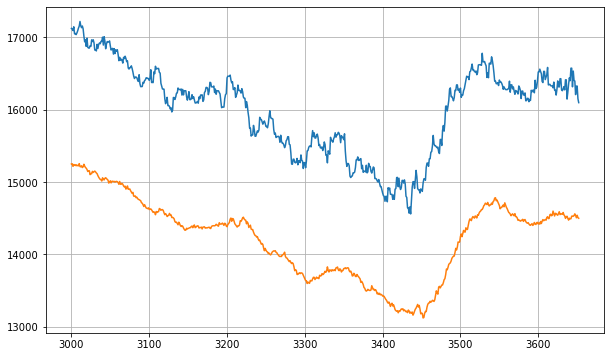

{'mae': 1776.0963, 'mse': 3191875.8, 'rmse': 1786.5822, 'mape': 11.090865, 'mase': 34.319603}


In [5]:
model_22 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1)
], name="model_22")

# Get initial weights
init_weights = model_22.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_22.set_weights(init_weights)

model_22.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_22.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_22 = model_22.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_22.name)])

# Load in best performing model
model_22 = tf.keras.models.load_model("model_experiments/model_22/")
model_22.evaluate(valid_set)

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_22, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_22 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_22))

eval_model_22 = evaluate_preds(y_true=x_valid,
                               y_pred=results_22)
print(eval_model_22)

Model: "model_23"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 batch_normalization (BatchN  (None, 128)              512       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 batch_normalization_1 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization_2 (Batc  (None, 32)               128

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 6s 141ms/step - loss: 15704.9990 - mae: 15705.5000 - val_loss: 15956.9473 - val_mae: 15957.4482
Epoch 2/100
16/24 [===================>..........] - ETA: 0s - loss: 15474.1191 - mae: 15474.6191

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 112ms/step - loss: 15704.8135 - mae: 15705.3145 - val_loss: 15955.1943 - val_mae: 15955.6953
Epoch 3/100
15/24 [=================>............] - ETA: 0s - loss: 15430.8350 - mae: 15431.3350

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 121ms/step - loss: 15704.5547 - mae: 15705.0547 - val_loss: 15954.1846 - val_mae: 15954.6836
Epoch 4/100
21/24 [=========================>....] - ETA: 0s - loss: 15651.9736 - mae: 15652.4736

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 111ms/step - loss: 15704.2158 - mae: 15704.7148 - val_loss: 15953.0850 - val_mae: 15953.5859
Epoch 5/100
15/24 [=================>............] - ETA: 0s - loss: 15443.0410 - mae: 15443.5410

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15703.7930 - mae: 15704.2920 - val_loss: 15953.0020 - val_mae: 15953.5020
Epoch 6/100
16/24 [===================>..........] - ETA: 0s - loss: 15475.2939 - mae: 15475.7939

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 110ms/step - loss: 15703.2715 - mae: 15703.7725 - val_loss: 15947.7979 - val_mae: 15948.2969
Epoch 7/100
16/24 [===================>..........] - ETA: 0s - loss: 15482.7773 - mae: 15483.2773

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 121ms/step - loss: 15702.6582 - mae: 15703.1582 - val_loss: 15945.6309 - val_mae: 15946.1299
Epoch 8/100
21/24 [=========================>....] - ETA: 0s - loss: 15645.0020 - mae: 15645.5020

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 111ms/step - loss: 15701.9492 - mae: 15702.4482 - val_loss: 15941.4072 - val_mae: 15941.9072
Epoch 9/100
16/24 [===================>..........] - ETA: 0s - loss: 15478.7676 - mae: 15479.2676

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15701.1416 - mae: 15701.6436 - val_loss: 15937.2344 - val_mae: 15937.7334
Epoch 10/100
24/24 [==============================] - 1s 21ms/step - loss: 15700.2383 - mae: 15700.7383 - val_loss: 15947.4619 - val_mae: 15947.9629
Epoch 11/100
24/24 [==============================] - 1s 21ms/step - loss: 15699.2393 - mae: 15699.7383 - val_loss: 15938.8281 - val_mae: 15939.3291
Epoch 12/100
24/24 [==============================] - 1s 22ms/step - loss: 15698.1377 - mae: 15698.6367 - val_loss: 15939.8311 - val_mae: 15940.3311
Epoch 13/100
24/24 [==============================] - 1s 20ms/step - loss: 15696.9473 - mae: 15697.4463 - val_loss: 15944.5391 - val_mae: 15945.0381
Epoch 14/100
24/24 [==============================] - 1s 20ms/step - loss: 15695.6553 - mae: 15696.1553 - val_loss: 15941.3037 - val_mae: 15941.8027
Epoch 15/100
16/24 [===================>..........] - ETA: 0s - loss: 15448.9609 - mae: 15449.4609

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15694.2695 - mae: 15694.7686 - val_loss: 15929.4482 - val_mae: 15929.9482
Epoch 16/100
24/24 [==============================] - 1s 20ms/step - loss: 15692.7881 - mae: 15693.2891 - val_loss: 15948.2500 - val_mae: 15948.7510
Epoch 17/100
24/24 [==============================] - 1s 20ms/step - loss: 15691.2119 - mae: 15691.7119 - val_loss: 15938.6006 - val_mae: 15939.0996
Epoch 18/100
24/24 [==============================] - 1s 20ms/step - loss: 15689.5449 - mae: 15690.0449 - val_loss: 15934.7236 - val_mae: 15935.2227
Epoch 19/100
16/24 [===================>..........] - ETA: 0s - loss: 15467.8906 - mae: 15468.3906

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 122ms/step - loss: 15687.7793 - mae: 15688.2783 - val_loss: 15896.1738 - val_mae: 15896.6738
Epoch 20/100
24/24 [==============================] - 1s 21ms/step - loss: 15685.9277 - mae: 15686.4268 - val_loss: 15903.6357 - val_mae: 15904.1348
Epoch 21/100
24/24 [==============================] - 1s 20ms/step - loss: 15683.9814 - mae: 15684.4805 - val_loss: 15930.9502 - val_mae: 15931.4512
Epoch 22/100
24/24 [==============================] - 1s 20ms/step - loss: 15681.9463 - mae: 15682.4453 - val_loss: 15931.8398 - val_mae: 15932.3398
Epoch 23/100
24/24 [==============================] - 1s 21ms/step - loss: 15679.8213 - mae: 15680.3203 - val_loss: 15912.4434 - val_mae: 15912.9434
Epoch 24/100
24/24 [==============================] - 1s 21ms/step - loss: 15677.6064 - mae: 15678.1064 - val_loss: 15924.3018 - val_mae: 15924.8008
Epoch 25/100
24/24 [==============================] - 1s 21ms/step - loss: 15675.3047 - mae: 15675.8047 - val_loss: 15

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15607.7881 - mae: 15608.2900 - val_loss: 15875.5654 - val_mae: 15876.0645
Epoch 47/100
15/24 [=================>............] - ETA: 0s - loss: 15323.6514 - mae: 15324.1514

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 110ms/step - loss: 15603.7188 - mae: 15604.2178 - val_loss: 15871.1367 - val_mae: 15871.6357
Epoch 48/100
16/24 [===================>..........] - ETA: 0s - loss: 15378.0850 - mae: 15378.5850

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 123ms/step - loss: 15599.5742 - mae: 15600.0742 - val_loss: 15841.1299 - val_mae: 15841.6309
Epoch 49/100
16/24 [===================>..........] - ETA: 0s - loss: 15387.5830 - mae: 15388.0830

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 115ms/step - loss: 15595.3545 - mae: 15595.8545 - val_loss: 15824.1865 - val_mae: 15824.6855
Epoch 50/100
24/24 [==============================] - 1s 21ms/step - loss: 15591.0654 - mae: 15591.5654 - val_loss: 15849.7285 - val_mae: 15850.2295
Epoch 51/100
24/24 [==============================] - 1s 21ms/step - loss: 15586.7031 - mae: 15587.2031 - val_loss: 15830.1699 - val_mae: 15830.6689
Epoch 52/100
24/24 [==============================] - 1s 21ms/step - loss: 15582.2725 - mae: 15582.7715 - val_loss: 15855.7676 - val_mae: 15856.2676
Epoch 53/100
24/24 [==============================] - 1s 21ms/step - loss: 15577.7686 - mae: 15578.2676 - val_loss: 15856.7324 - val_mae: 15857.2324
Epoch 54/100
24/24 [==============================] - 1s 21ms/step - loss: 15573.1943 - mae: 15573.6943 - val_loss: 15868.9375 - val_mae: 15869.4385
Epoch 55/100
24/24 [==============================] - 1s 20ms/step - loss: 15568.5518 - mae: 15569.0518 - val_loss: 15

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 111ms/step - loss: 15554.2129 - mae: 15554.7129 - val_loss: 15823.8945 - val_mae: 15824.3936
Epoch 59/100
15/24 [=================>............] - ETA: 0s - loss: 15283.4521 - mae: 15283.9521

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 111ms/step - loss: 15549.2930 - mae: 15549.7930 - val_loss: 15810.9131 - val_mae: 15811.4121
Epoch 60/100
24/24 [==============================] - 1s 20ms/step - loss: 15544.3086 - mae: 15544.8076 - val_loss: 15816.9600 - val_mae: 15817.4609
Epoch 61/100
16/24 [===================>..........] - ETA: 0s - loss: 15303.7324 - mae: 15304.2324

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 120ms/step - loss: 15539.2578 - mae: 15539.7588 - val_loss: 15797.1318 - val_mae: 15797.6328
Epoch 62/100
16/24 [===================>..........] - ETA: 0s - loss: 15329.7822 - mae: 15330.2822

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15534.1396 - mae: 15534.6396 - val_loss: 15774.0693 - val_mae: 15774.5693
Epoch 63/100
16/24 [===================>..........] - ETA: 0s - loss: 15307.4463 - mae: 15307.9463

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15528.9590 - mae: 15529.4590 - val_loss: 15748.4609 - val_mae: 15748.9600
Epoch 64/100
24/24 [==============================] - 1s 21ms/step - loss: 15523.7100 - mae: 15524.2100 - val_loss: 15763.4980 - val_mae: 15763.9971
Epoch 65/100
24/24 [==============================] - 1s 21ms/step - loss: 15518.3955 - mae: 15518.8955 - val_loss: 15749.2646 - val_mae: 15749.7637
Epoch 66/100
16/24 [===================>..........] - ETA: 0s - loss: 15282.8027 - mae: 15283.3027

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 120ms/step - loss: 15513.0186 - mae: 15513.5195 - val_loss: 15727.3867 - val_mae: 15727.8877
Epoch 67/100
24/24 [==============================] - 1s 21ms/step - loss: 15507.5762 - mae: 15508.0752 - val_loss: 15728.5010 - val_mae: 15729.0020
Epoch 68/100
24/24 [==============================] - 1s 21ms/step - loss: 15502.0684 - mae: 15502.5684 - val_loss: 15752.0723 - val_mae: 15752.5732
Epoch 69/100
24/24 [==============================] - 1s 21ms/step - loss: 15496.4980 - mae: 15496.9980 - val_loss: 15739.2812 - val_mae: 15739.7812
Epoch 70/100
16/24 [===================>..........] - ETA: 0s - loss: 15264.5293 - mae: 15265.0293

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 108ms/step - loss: 15490.8643 - mae: 15491.3643 - val_loss: 15712.7549 - val_mae: 15713.2539
Epoch 71/100
16/24 [===================>..........] - ETA: 0s - loss: 15255.1055 - mae: 15255.6055

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 113ms/step - loss: 15485.1689 - mae: 15485.6699 - val_loss: 15698.3896 - val_mae: 15698.8896
Epoch 72/100
16/24 [===================>..........] - ETA: 0s - loss: 15259.4346 - mae: 15259.9346

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 124ms/step - loss: 15479.4131 - mae: 15479.9121 - val_loss: 15688.8682 - val_mae: 15689.3672
Epoch 73/100
16/24 [===================>..........] - ETA: 0s - loss: 15252.3203 - mae: 15252.8203

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 122ms/step - loss: 15473.5918 - mae: 15474.0918 - val_loss: 15676.3418 - val_mae: 15676.8408
Epoch 74/100
24/24 [==============================] - 1s 21ms/step - loss: 15467.7090 - mae: 15468.2090 - val_loss: 15687.1719 - val_mae: 15687.6709
Epoch 75/100
16/24 [===================>..........] - ETA: 0s - loss: 15235.0664 - mae: 15235.5664

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 110ms/step - loss: 15461.7686 - mae: 15462.2676 - val_loss: 15673.7412 - val_mae: 15674.2422
Epoch 76/100
16/24 [===================>..........] - ETA: 0s - loss: 15244.0674 - mae: 15244.5674

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15455.7627 - mae: 15456.2627 - val_loss: 15669.3711 - val_mae: 15669.8721
Epoch 77/100
16/24 [===================>..........] - ETA: 0s - loss: 15229.1562 - mae: 15229.6562

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 118ms/step - loss: 15449.6982 - mae: 15450.1992 - val_loss: 15652.5762 - val_mae: 15653.0752
Epoch 78/100
16/24 [===================>..........] - ETA: 0s - loss: 15233.6064 - mae: 15234.1064

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 113ms/step - loss: 15443.5732 - mae: 15444.0723 - val_loss: 15612.1699 - val_mae: 15612.6709
Epoch 79/100
16/24 [===================>..........] - ETA: 0s - loss: 15228.9971 - mae: 15229.4971

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 110ms/step - loss: 15437.3887 - mae: 15437.8887 - val_loss: 15606.4688 - val_mae: 15606.9678
Epoch 80/100
21/24 [=========================>....] - ETA: 0s - loss: 15374.5225 - mae: 15375.0225

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 112ms/step - loss: 15431.1445 - mae: 15431.6445 - val_loss: 15604.0898 - val_mae: 15604.5908
Epoch 81/100
24/24 [==============================] - 1s 21ms/step - loss: 15424.8408 - mae: 15425.3398 - val_loss: 15654.6064 - val_mae: 15655.1055
Epoch 82/100
24/24 [==============================] - 1s 22ms/step - loss: 15418.4824 - mae: 15418.9834 - val_loss: 15649.0654 - val_mae: 15649.5664
Epoch 83/100
24/24 [==============================] - 1s 24ms/step - loss: 15412.0615 - mae: 15412.5615 - val_loss: 15657.7734 - val_mae: 15658.2725
Epoch 84/100
24/24 [==============================] - 1s 22ms/step - loss: 15405.5820 - mae: 15406.0820 - val_loss: 15639.8584 - val_mae: 15640.3584
Epoch 85/100
24/24 [==============================] - 1s 24ms/step - loss: 15399.0449 - mae: 15399.5449 - val_loss: 15629.5332 - val_mae: 15630.0342
Epoch 86/100
24/24 [==============================] - 1s 24ms/step - loss: 15392.4473 - mae: 15392.9473 - val_loss: 15

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 129ms/step - loss: 15351.6865 - mae: 15352.1875 - val_loss: 15594.0967 - val_mae: 15594.5957
Epoch 93/100
24/24 [==============================] - 1s 25ms/step - loss: 15344.6953 - mae: 15345.1963 - val_loss: 15604.8105 - val_mae: 15605.3096
Epoch 94/100
19/24 [======================>.......] - ETA: 0s - loss: 15235.5547 - mae: 15236.0547

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 114ms/step - loss: 15337.6494 - mae: 15338.1504 - val_loss: 15591.6680 - val_mae: 15592.1670
Epoch 95/100
16/24 [===================>..........] - ETA: 0s - loss: 15098.7119 - mae: 15099.2119

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 109ms/step - loss: 15330.5479 - mae: 15331.0479 - val_loss: 15583.4209 - val_mae: 15583.9199
Epoch 96/100
15/24 [=================>............] - ETA: 0s - loss: 15049.0166 - mae: 15049.5166

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 4s 144ms/step - loss: 15323.3896 - mae: 15323.8906 - val_loss: 15559.3242 - val_mae: 15559.8252
Epoch 97/100
16/24 [===================>..........] - ETA: 0s - loss: 15080.9746 - mae: 15081.4746

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 118ms/step - loss: 15316.1807 - mae: 15316.6797 - val_loss: 15546.5469 - val_mae: 15547.0479
Epoch 98/100
15/24 [=================>............] - ETA: 0s - loss: 15037.8027 - mae: 15038.3027

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 132ms/step - loss: 15308.9131 - mae: 15309.4131 - val_loss: 15518.1914 - val_mae: 15518.6904
Epoch 99/100
16/24 [===================>..........] - ETA: 0s - loss: 15064.1836 - mae: 15064.6836

INFO:tensorflow:Assets written to: model_experiments\model_23\assets


INFO:tensorflow:Assets written to: model_experiments\model_23\assets


24/24 [==============================] - 3s 118ms/step - loss: 15301.5947 - mae: 15302.0947 - val_loss: 15495.4395 - val_mae: 15495.9404
Epoch 100/100
6/6 [==============================] - 0s 26ms/step


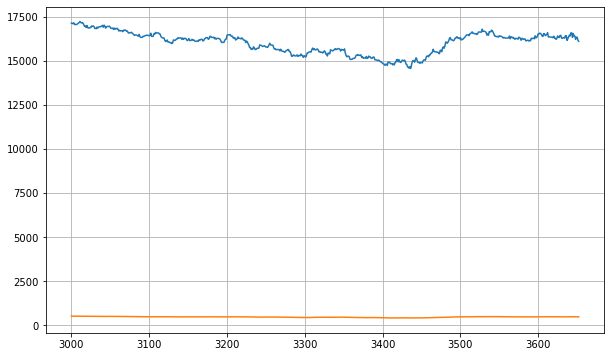

{'mae': 15542.963, 'mse': 241927900.0, 'rmse': 15554.032, 'mape': 97.10986, 'mase': 300.33746}


In [6]:
model_23 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(1)
], name="model_23")

# Get initial weights
init_weights = model_23.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_23.set_weights(init_weights)

model_23.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_23.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_23 = model_23.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_23.name)])

# Load in best performing model
model_23 = tf.keras.models.load_model("model_experiments/model_23/")
model_23.evaluate(valid_set)

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_23, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_23 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_23))

eval_model_23 = evaluate_preds(y_true=x_valid,
                               y_pred=results_23)
print(eval_model_23)

Model: "model_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     16/Unknown - 2s 22ms/step - loss: 8087.8931 - mae: 8086.7280 

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 4s 94ms/step - loss: 5772.7358 - mae: 5771.6201 - val_loss: 309.9515 - val_mae: 309.0094
Epoch 2/100
15/24 [=================>............] - ETA: 0s - loss: 281.9258 - mae: 281.0609

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 76ms/step - loss: 257.2417 - mae: 256.4168 - val_loss: 174.0856 - val_mae: 173.3792
Epoch 3/100
24/24 [==============================] - 1s 22ms/step - loss: 210.6085 - mae: 209.9811 - val_loss: 185.3589 - val_mae: 184.8106
Epoch 4/100
24/24 [==============================] - 1s 25ms/step - loss: 204.2812 - mae: 203.7855 - val_loss: 182.9542 - val_mae: 182.5112
Epoch 5/100
19/24 [======================>.......] - ETA: 0s - loss: 215.1899 - mae: 214.7758

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 75ms/step - loss: 212.3733 - mae: 211.9647 - val_loss: 151.4294 - val_mae: 151.0540
Epoch 6/100
24/24 [==============================] - 1s 21ms/step - loss: 231.0046 - mae: 230.6519 - val_loss: 240.0541 - val_mae: 239.7245
Epoch 7/100
16/24 [===================>..........] - ETA: 0s - loss: 206.6912 - mae: 206.3711

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 75ms/step - loss: 202.9947 - mae: 202.6791 - val_loss: 142.1439 - val_mae: 141.8431
Epoch 8/100
16/24 [===================>..........] - ETA: 0s - loss: 193.4399 - mae: 193.1446

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 73ms/step - loss: 193.9284 - mae: 193.6361 - val_loss: 140.4466 - val_mae: 140.1642
Epoch 9/100
24/24 [==============================] - 1s 20ms/step - loss: 204.4474 - mae: 204.1707 - val_loss: 211.2873 - val_mae: 211.0161
Epoch 10/100
24/24 [==============================] - 1s 23ms/step - loss: 203.1334 - mae: 202.8659 - val_loss: 150.9975 - val_mae: 150.7343
Epoch 11/100
16/24 [===================>..........] - ETA: 0s - loss: 192.3053 - mae: 192.0435

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 79ms/step - loss: 190.7574 - mae: 190.4960 - val_loss: 134.4947 - val_mae: 134.2360
Epoch 12/100
24/24 [==============================] - 1s 22ms/step - loss: 243.7631 - mae: 243.5063 - val_loss: 138.4559 - val_mae: 138.1992
Epoch 13/100
24/24 [==============================] - 1s 21ms/step - loss: 184.9714 - mae: 184.7166 - val_loss: 140.8834 - val_mae: 140.6298
Epoch 14/100
16/24 [===================>..........] - ETA: 0s - loss: 184.7369 - mae: 184.4842

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 72ms/step - loss: 191.2889 - mae: 191.0361 - val_loss: 132.8525 - val_mae: 132.5994
Epoch 15/100
24/24 [==============================] - 1s 22ms/step - loss: 208.9429 - mae: 208.6914 - val_loss: 295.0501 - val_mae: 294.7996
Epoch 16/100
24/24 [==============================] - 1s 22ms/step - loss: 210.7654 - mae: 210.5142 - val_loss: 133.3071 - val_mae: 133.0559
Epoch 17/100
15/24 [=================>............] - ETA: 0s - loss: 178.3484 - mae: 178.0988

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 82ms/step - loss: 173.2840 - mae: 173.0341 - val_loss: 125.5872 - val_mae: 125.3368
Epoch 18/100
24/24 [==============================] - 1s 21ms/step - loss: 167.2427 - mae: 166.9929 - val_loss: 135.5360 - val_mae: 135.2862
Epoch 19/100
24/24 [==============================] - 1s 20ms/step - loss: 161.0115 - mae: 160.7626 - val_loss: 134.9232 - val_mae: 134.6752
Epoch 20/100
24/24 [==============================] - 1s 20ms/step - loss: 231.1536 - mae: 230.9057 - val_loss: 215.0544 - val_mae: 214.8072
Epoch 21/100
24/24 [==============================] - 1s 21ms/step - loss: 221.2649 - mae: 221.0178 - val_loss: 202.9538 - val_mae: 202.7067
Epoch 22/100
24/24 [==============================] - 1s 20ms/step - loss: 183.3104 - mae: 183.0636 - val_loss: 252.7478 - val_mae: 252.5015
Epoch 23/100
16/24 [===================>..........] - ETA: 0s - loss: 190.5236 - mae: 190.2771

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 68ms/step - loss: 180.0305 - mae: 179.7841 - val_loss: 118.3243 - val_mae: 118.0777
Epoch 24/100
24/24 [==============================] - 1s 24ms/step - loss: 148.2537 - mae: 148.0073 - val_loss: 120.7032 - val_mae: 120.4572
Epoch 25/100
24/24 [==============================] - 1s 26ms/step - loss: 199.2801 - mae: 199.0347 - val_loss: 254.0603 - val_mae: 253.8136
Epoch 26/100
24/24 [==============================] - 1s 25ms/step - loss: 217.6671 - mae: 217.4221 - val_loss: 215.9510 - val_mae: 215.7062
Epoch 27/100
24/24 [==============================] - 1s 21ms/step - loss: 201.0147 - mae: 200.7696 - val_loss: 135.1103 - val_mae: 134.8660
Epoch 28/100
24/24 [==============================] - 1s 21ms/step - loss: 172.2655 - mae: 172.0212 - val_loss: 147.9913 - val_mae: 147.7474
Epoch 29/100
24/24 [==============================] - 1s 21ms/step - loss: 148.4496 - mae: 148.2052 - val_loss: 136.2847 - val_mae: 136.0405
Epoch 30/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 73ms/step - loss: 145.2111 - mae: 144.9670 - val_loss: 110.5977 - val_mae: 110.3548
Epoch 32/100
24/24 [==============================] - 1s 20ms/step - loss: 140.0508 - mae: 139.8077 - val_loss: 128.5475 - val_mae: 128.3041
Epoch 33/100
16/24 [===================>..........] - ETA: 0s - loss: 150.8535 - mae: 150.6103

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 69ms/step - loss: 143.8512 - mae: 143.6081 - val_loss: 108.6591 - val_mae: 108.4139
Epoch 34/100
24/24 [==============================] - 1s 20ms/step - loss: 141.0800 - mae: 140.8363 - val_loss: 148.3023 - val_mae: 148.0594
Epoch 35/100
24/24 [==============================] - 1s 21ms/step - loss: 202.4832 - mae: 202.2403 - val_loss: 259.3267 - val_mae: 259.0846
Epoch 36/100
16/24 [===================>..........] - ETA: 0s - loss: 204.4717 - mae: 204.2293

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 69ms/step - loss: 186.8524 - mae: 186.6100 - val_loss: 106.6258 - val_mae: 106.3839
Epoch 37/100
24/24 [==============================] - 1s 20ms/step - loss: 144.9841 - mae: 144.7413 - val_loss: 109.6638 - val_mae: 109.4222
Epoch 38/100
24/24 [==============================] - 1s 21ms/step - loss: 218.8610 - mae: 218.6191 - val_loss: 201.5504 - val_mae: 201.3092
Epoch 39/100
24/24 [==============================] - 1s 21ms/step - loss: 203.3755 - mae: 203.1342 - val_loss: 221.3029 - val_mae: 221.0616
Epoch 40/100
24/24 [==============================] - 1s 20ms/step - loss: 190.6706 - mae: 190.4293 - val_loss: 178.9423 - val_mae: 178.7015
Epoch 41/100
24/24 [==============================] - 1s 20ms/step - loss: 170.9245 - mae: 170.6827 - val_loss: 123.8841 - val_mae: 123.6408
Epoch 42/100
24/24 [==============================] - 1s 20ms/step - loss: 155.6608 - mae: 155.4189 - val_loss: 172.4247 - val_mae: 172.1832
Epoch 43/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 68ms/step - loss: 127.8559 - mae: 127.6123 - val_loss: 100.3367 - val_mae: 100.0926
Epoch 54/100
24/24 [==============================] - 1s 21ms/step - loss: 153.2608 - mae: 153.0168 - val_loss: 169.9224 - val_mae: 169.6778
Epoch 55/100
24/24 [==============================] - 1s 21ms/step - loss: 186.7798 - mae: 186.5360 - val_loss: 209.4834 - val_mae: 209.2401
Epoch 56/100
24/24 [==============================] - 1s 20ms/step - loss: 172.2755 - mae: 172.0313 - val_loss: 145.1161 - val_mae: 144.8692
Epoch 57/100
24/24 [==============================] - 1s 20ms/step - loss: 138.9521 - mae: 138.7065 - val_loss: 125.1492 - val_mae: 124.9034
Epoch 58/100
24/24 [==============================] - 1s 20ms/step - loss: 123.4638 - mae: 123.2166 - val_loss: 134.7433 - val_mae: 134.4967
Epoch 59/100
16/24 [===================>..........] - ETA: 0s - loss: 123.5524 - mae: 123.3050

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 79ms/step - loss: 122.4696 - mae: 122.2224 - val_loss: 99.0685 - val_mae: 98.8209
Epoch 60/100
24/24 [==============================] - 1s 20ms/step - loss: 147.6999 - mae: 147.4525 - val_loss: 143.8519 - val_mae: 143.6051
Epoch 61/100
16/24 [===================>..........] - ETA: 0s - loss: 145.8681 - mae: 145.6208

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 69ms/step - loss: 148.0561 - mae: 147.8089 - val_loss: 94.6504 - val_mae: 94.4030
Epoch 62/100
24/24 [==============================] - 1s 21ms/step - loss: 131.8470 - mae: 131.5999 - val_loss: 101.7151 - val_mae: 101.4686
Epoch 63/100
24/24 [==============================] - 1s 20ms/step - loss: 125.2853 - mae: 125.0379 - val_loss: 101.8677 - val_mae: 101.6220
Epoch 64/100
16/24 [===================>..........] - ETA: 0s - loss: 121.5444 - mae: 121.2979

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 68ms/step - loss: 125.3655 - mae: 125.1192 - val_loss: 92.8718 - val_mae: 92.6267
Epoch 65/100
24/24 [==============================] - 1s 20ms/step - loss: 135.3763 - mae: 135.1306 - val_loss: 116.8793 - val_mae: 116.6341
Epoch 66/100
15/24 [=================>............] - ETA: 0s - loss: 122.6510 - mae: 122.4055

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 72ms/step - loss: 122.7595 - mae: 122.5140 - val_loss: 92.7748 - val_mae: 92.5276
Epoch 67/100
24/24 [==============================] - 1s 20ms/step - loss: 118.8079 - mae: 118.5619 - val_loss: 151.3329 - val_mae: 151.0884
Epoch 68/100
24/24 [==============================] - 1s 21ms/step - loss: 136.1298 - mae: 135.8849 - val_loss: 119.8208 - val_mae: 119.5750
Epoch 69/100
16/24 [===================>..........] - ETA: 0s - loss: 122.7835 - mae: 122.5384

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 69ms/step - loss: 128.9168 - mae: 128.6717 - val_loss: 92.0047 - val_mae: 91.7589
Epoch 70/100
24/24 [==============================] - 1s 21ms/step - loss: 132.2235 - mae: 131.9785 - val_loss: 195.8555 - val_mae: 195.6117
Epoch 71/100
24/24 [==============================] - 1s 20ms/step - loss: 219.9739 - mae: 219.7303 - val_loss: 291.4396 - val_mae: 291.1964
Epoch 72/100
24/24 [==============================] - 1s 21ms/step - loss: 211.6573 - mae: 211.4144 - val_loss: 150.6226 - val_mae: 150.3795
Epoch 73/100
24/24 [==============================] - 1s 21ms/step - loss: 154.5464 - mae: 154.3038 - val_loss: 120.5555 - val_mae: 120.3117
Epoch 74/100
16/24 [===================>..........] - ETA: 0s - loss: 113.4032 - mae: 113.1604

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 69ms/step - loss: 112.2652 - mae: 112.0224 - val_loss: 91.4131 - val_mae: 91.1707
Epoch 75/100
24/24 [==============================] - 1s 22ms/step - loss: 108.7757 - mae: 108.5329 - val_loss: 94.3609 - val_mae: 94.1177
Epoch 76/100
16/24 [===================>..........] - ETA: 0s - loss: 113.3952 - mae: 113.1530

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 67ms/step - loss: 111.4379 - mae: 111.1956 - val_loss: 90.9416 - val_mae: 90.6981
Epoch 77/100
24/24 [==============================] - 1s 20ms/step - loss: 113.0655 - mae: 112.8226 - val_loss: 246.4091 - val_mae: 246.1672
Epoch 78/100
24/24 [==============================] - 1s 20ms/step - loss: 206.0518 - mae: 205.8099 - val_loss: 506.5945 - val_mae: 506.3532
Epoch 79/100
24/24 [==============================] - 1s 20ms/step - loss: 424.1311 - mae: 423.8897 - val_loss: 256.0635 - val_mae: 255.8231
Epoch 80/100
24/24 [==============================] - 1s 20ms/step - loss: 142.9578 - mae: 142.7160 - val_loss: 119.2909 - val_mae: 119.0504
Epoch 81/100
24/24 [==============================] - 1s 20ms/step - loss: 131.8954 - mae: 131.6549 - val_loss: 117.9137 - val_mae: 117.6720
Epoch 82/100
24/24 [==============================] - 1s 20ms/step - loss: 114.9966 - mae: 114.7552 - val_loss: 103.9665 - val_mae: 103.7252
Epoch 83/100
24/24 [========

INFO:tensorflow:Assets written to: model_experiments\model_24\assets


INFO:tensorflow:Assets written to: model_experiments\model_24\assets


24/24 [==============================] - 2s 80ms/step - loss: 123.3903 - mae: 123.1530 - val_loss: 89.5164 - val_mae: 89.2777
Epoch 96/100
24/24 [==============================] - 1s 20ms/step - loss: 109.7436 - mae: 109.5066 - val_loss: 174.3725 - val_mae: 174.1366
Epoch 97/100
24/24 [==============================] - 1s 20ms/step - loss: 148.3201 - mae: 148.0834 - val_loss: 93.1175 - val_mae: 92.8799
Epoch 98/100
24/24 [==============================] - 1s 21ms/step - loss: 143.7980 - mae: 143.5617 - val_loss: 104.0553 - val_mae: 103.8198
Epoch 99/100
24/24 [==============================] - 1s 20ms/step - loss: 114.1029 - mae: 113.8663 - val_loss: 206.3692 - val_mae: 206.1340
Epoch 100/100
6/6 [==============================] - 0s 22ms/step


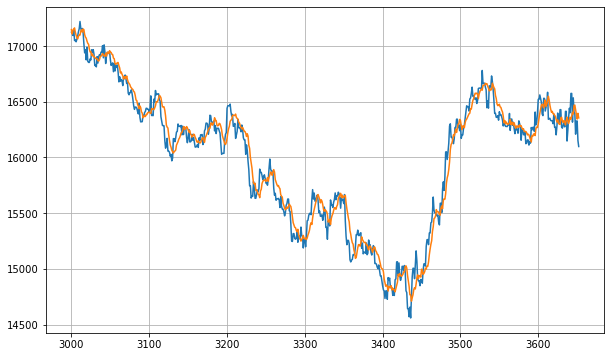

{'mae': 88.346825, 'mse': 12624.437, 'rmse': 112.35852, 'mape': 0.55632776, 'mase': 1.7071303}


In [7]:
model_24 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
], name="model_24")

# Get initial weights
init_weights = model_24.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_24.set_weights(init_weights)

model_24.summary()

# Initialize the optimizer
optimizer = tf.keras.optimizers.Adam()

# Set the training parameters
model_24.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_24 = model_24.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_24.name)])

# Load in best performing model
model_24 = tf.keras.models.load_model("model_experiments/model_24/")
model_24.evaluate(valid_set)

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_24, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_24 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_24))

eval_model_24 = evaluate_preds(y_true=x_valid,
                               y_pred=results_24)
print(eval_model_24)

Model: "model_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 14,337
Trainable params: 14,337
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
     16/Unknown - 2s 20ms/step - loss: 5306.4624 - mae: 5306.9624

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 3s 74ms/step - loss: 3916.4797 - mae: 3916.9797 - val_loss: 602.9332 - val_mae: 603.4332
Epoch 2/100
16/24 [===================>..........] - ETA: 0s - loss: 429.9090 - mae: 430.4090

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 62ms/step - loss: 377.1638 - mae: 377.6638 - val_loss: 145.8594 - val_mae: 146.3586
Epoch 3/100
24/24 [==============================] - 1s 20ms/step - loss: 207.1831 - mae: 207.6828 - val_loss: 154.2708 - val_mae: 154.7702
Epoch 4/100
24/24 [==============================] - 1s 20ms/step - loss: 210.2155 - mae: 210.7151 - val_loss: 150.4575 - val_mae: 150.9547
Epoch 5/100
16/24 [===================>..........] - ETA: 0s - loss: 195.4763 - mae: 195.9761

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 62ms/step - loss: 188.7509 - mae: 189.2504 - val_loss: 144.0221 - val_mae: 144.5209
Epoch 6/100
24/24 [==============================] - 1s 20ms/step - loss: 193.7842 - mae: 194.2834 - val_loss: 165.8853 - val_mae: 166.3852
Epoch 7/100
24/24 [==============================] - 1s 20ms/step - loss: 183.5069 - mae: 184.0064 - val_loss: 205.6962 - val_mae: 206.1962
Epoch 8/100
24/24 [==============================] - 1s 20ms/step - loss: 207.7001 - mae: 208.1995 - val_loss: 334.4079 - val_mae: 334.9073
Epoch 9/100
24/24 [==============================] - 1s 20ms/step - loss: 236.1605 - mae: 236.6602 - val_loss: 212.4495 - val_mae: 212.9492
Epoch 10/100
16/24 [===================>..........] - ETA: 0s - loss: 193.1086 - mae: 193.6080

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 61ms/step - loss: 187.1021 - mae: 187.6014 - val_loss: 140.8409 - val_mae: 141.3397
Epoch 11/100
24/24 [==============================] - 1s 20ms/step - loss: 178.5157 - mae: 179.0152 - val_loss: 209.5780 - val_mae: 210.0780
Epoch 12/100
24/24 [==============================] - 1s 20ms/step - loss: 179.8387 - mae: 180.3382 - val_loss: 242.7786 - val_mae: 243.2780
Epoch 13/100
24/24 [==============================] - 1s 20ms/step - loss: 190.5437 - mae: 191.0433 - val_loss: 143.9342 - val_mae: 144.4342
Epoch 14/100
24/24 [==============================] - 1s 21ms/step - loss: 159.3371 - mae: 159.8366 - val_loss: 206.4822 - val_mae: 206.9821
Epoch 15/100
24/24 [==============================] - 1s 25ms/step - loss: 167.6450 - mae: 168.1446 - val_loss: 190.7612 - val_mae: 191.2606
Epoch 16/100
24/24 [==============================] - 1s 26ms/step - loss: 199.8800 - mae: 200.3793 - val_loss: 143.9772 - val_mae: 144.4769
Epoch 17/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 68ms/step - loss: 162.4911 - mae: 162.9900 - val_loss: 109.8376 - val_mae: 110.3367
Epoch 21/100
15/24 [=================>............] - ETA: 0s - loss: 157.8381 - mae: 158.3374

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 66ms/step - loss: 154.2659 - mae: 154.7649 - val_loss: 108.8416 - val_mae: 109.3409
Epoch 22/100
24/24 [==============================] - 1s 26ms/step - loss: 156.7778 - mae: 157.2773 - val_loss: 123.1566 - val_mae: 123.6563
Epoch 23/100
24/24 [==============================] - 1s 23ms/step - loss: 156.9081 - mae: 157.4073 - val_loss: 111.3709 - val_mae: 111.8706
Epoch 24/100
24/24 [==============================] - 1s 21ms/step - loss: 144.2437 - mae: 144.7433 - val_loss: 111.1968 - val_mae: 111.6965
Epoch 25/100
24/24 [==============================] - 1s 21ms/step - loss: 137.8780 - mae: 138.3769 - val_loss: 111.1937 - val_mae: 111.6929
Epoch 26/100
24/24 [==============================] - 1s 21ms/step - loss: 159.1057 - mae: 159.6050 - val_loss: 362.0282 - val_mae: 362.5282
Epoch 27/100
24/24 [==============================] - 1s 23ms/step - loss: 248.6999 - mae: 249.1999 - val_loss: 178.7534 - val_mae: 179.2534
Epoch 28/100
24/24 [======

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 72ms/step - loss: 132.3170 - mae: 132.8163 - val_loss: 102.3252 - val_mae: 102.8247
Epoch 44/100
16/24 [===================>..........] - ETA: 0s - loss: 120.8295 - mae: 121.3287

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 62ms/step - loss: 121.7967 - mae: 122.2959 - val_loss: 97.2292 - val_mae: 97.7287
Epoch 45/100
24/24 [==============================] - 1s 23ms/step - loss: 123.8037 - mae: 124.3023 - val_loss: 134.8436 - val_mae: 135.3427
Epoch 46/100
24/24 [==============================] - 1s 23ms/step - loss: 173.7104 - mae: 174.2099 - val_loss: 198.6165 - val_mae: 199.1161
Epoch 47/100
22/24 [==========================>...] - ETA: 0s - loss: 148.7489 - mae: 149.2482

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 69ms/step - loss: 146.3503 - mae: 146.8497 - val_loss: 95.5381 - val_mae: 96.0351
Epoch 48/100
24/24 [==============================] - 1s 21ms/step - loss: 128.6711 - mae: 129.1704 - val_loss: 98.6234 - val_mae: 99.1205
Epoch 49/100
24/24 [==============================] - 1s 21ms/step - loss: 121.4822 - mae: 121.9813 - val_loss: 132.9553 - val_mae: 133.4547
Epoch 50/100
24/24 [==============================] - 1s 21ms/step - loss: 156.3511 - mae: 156.8505 - val_loss: 109.8957 - val_mae: 110.3953
Epoch 51/100
16/24 [===================>..........] - ETA: 0s - loss: 133.8412 - mae: 134.3408

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 67ms/step - loss: 137.5927 - mae: 138.0922 - val_loss: 93.0575 - val_mae: 93.5534
Epoch 52/100
24/24 [==============================] - 1s 28ms/step - loss: 135.8376 - mae: 136.3373 - val_loss: 361.9156 - val_mae: 362.4156
Epoch 53/100
24/24 [==============================] - 1s 21ms/step - loss: 239.9912 - mae: 240.4908 - val_loss: 101.9581 - val_mae: 102.4578
Epoch 54/100
24/24 [==============================] - 1s 23ms/step - loss: 160.2476 - mae: 160.7468 - val_loss: 97.2641 - val_mae: 97.7638
Epoch 55/100
24/24 [==============================] - 1s 30ms/step - loss: 124.3183 - mae: 124.8177 - val_loss: 178.1960 - val_mae: 178.6960
Epoch 56/100
24/24 [==============================] - 1s 25ms/step - loss: 127.2035 - mae: 127.7029 - val_loss: 98.5020 - val_mae: 99.0014
Epoch 57/100
24/24 [==============================] - 1s 25ms/step - loss: 117.3742 - mae: 117.8734 - val_loss: 120.4008 - val_mae: 120.8998
Epoch 58/100
24/24 [============

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 3s 105ms/step - loss: 116.4735 - mae: 116.9724 - val_loss: 92.5807 - val_mae: 93.0801
Epoch 63/100
24/24 [==============================] - 1s 31ms/step - loss: 115.2811 - mae: 115.7807 - val_loss: 130.5758 - val_mae: 131.0742
Epoch 64/100
24/24 [==============================] - 1s 25ms/step - loss: 118.2513 - mae: 118.7506 - val_loss: 103.7339 - val_mae: 104.2330
Epoch 65/100
24/24 [==============================] - 1s 19ms/step - loss: 115.5493 - mae: 116.0483 - val_loss: 96.9791 - val_mae: 97.4780
Epoch 66/100
24/24 [==============================] - 1s 22ms/step - loss: 164.6108 - mae: 165.1101 - val_loss: 390.7670 - val_mae: 391.2670
Epoch 67/100
24/24 [==============================] - 1s 21ms/step - loss: 195.3503 - mae: 195.8499 - val_loss: 175.8008 - val_mae: 176.3008
Epoch 68/100
15/24 [=================>............] - ETA: 0s - loss: 164.3947 - mae: 164.8938

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 69ms/step - loss: 159.2244 - mae: 159.7234 - val_loss: 89.8811 - val_mae: 90.3807
Epoch 69/100
16/24 [===================>..........] - ETA: 0s - loss: 115.8474 - mae: 116.3464

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 65ms/step - loss: 115.4715 - mae: 115.9705 - val_loss: 88.8801 - val_mae: 89.3780
Epoch 70/100
24/24 [==============================] - 1s 19ms/step - loss: 103.5419 - mae: 104.0405 - val_loss: 128.1897 - val_mae: 128.6880
Epoch 71/100
16/24 [===================>..........] - ETA: 0s - loss: 117.1468 - mae: 117.6457

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 62ms/step - loss: 119.3681 - mae: 119.8671 - val_loss: 87.7676 - val_mae: 88.2650
Epoch 72/100
24/24 [==============================] - 1s 22ms/step - loss: 162.3488 - mae: 162.8484 - val_loss: 298.2926 - val_mae: 298.7926
Epoch 73/100
24/24 [==============================] - 1s 21ms/step - loss: 163.3822 - mae: 163.8818 - val_loss: 130.1072 - val_mae: 130.6056
Epoch 74/100
24/24 [==============================] - 1s 21ms/step - loss: 157.2505 - mae: 157.7500 - val_loss: 205.1161 - val_mae: 205.6161
Epoch 75/100
24/24 [==============================] - 1s 23ms/step - loss: 141.3572 - mae: 141.8564 - val_loss: 142.5885 - val_mae: 143.0879
Epoch 76/100
24/24 [==============================] - 1s 21ms/step - loss: 113.9222 - mae: 114.4213 - val_loss: 143.0095 - val_mae: 143.5091
Epoch 77/100
24/24 [==============================] - 1s 23ms/step - loss: 119.7650 - mae: 120.2645 - val_loss: 90.6238 - val_mae: 91.1215
Epoch 78/100
24/24 [==========

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


24/24 [==============================] - 2s 65ms/step - loss: 107.5459 - mae: 108.0454 - val_loss: 85.5609 - val_mae: 86.0592
Epoch 92/100
24/24 [==============================] - 1s 21ms/step - loss: 100.7675 - mae: 101.2667 - val_loss: 125.8568 - val_mae: 126.3558
Epoch 93/100
24/24 [==============================] - 1s 21ms/step - loss: 150.6687 - mae: 151.1681 - val_loss: 124.0396 - val_mae: 124.5388
Epoch 94/100
24/24 [==============================] - 1s 20ms/step - loss: 171.6356 - mae: 172.1353 - val_loss: 196.8582 - val_mae: 197.3582
Epoch 95/100
24/24 [==============================] - 1s 20ms/step - loss: 137.0223 - mae: 137.5211 - val_loss: 101.9838 - val_mae: 102.4818
Epoch 96/100
24/24 [==============================] - 1s 22ms/step - loss: 118.7921 - mae: 119.2906 - val_loss: 221.4204 - val_mae: 221.9204
Epoch 97/100
24/24 [==============================] - 1s 23ms/step - loss: 150.5167 - mae: 151.0158 - val_loss: 140.2123 - val_mae: 140.7123
Epoch 98/100
24/24 [========

INFO:tensorflow:Assets written to: model_experiments\model_25\assets


INFO:tensorflow:Assets written to: model_experiments\model_25\assets


6/6 [==============================] - 0s 23ms/step


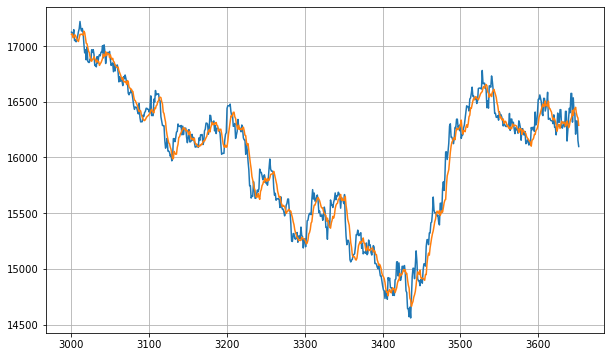

{'mae': 84.01237, 'mse': 11758.479, 'rmse': 108.436516, 'mape': 0.52847254, 'mase': 1.6233753}


In [8]:
model_25 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_25")

# Get initial weights
init_weights = model_25.get_weights()

# Reset states generated by Keras
tf.keras.backend.clear_session()

# Reset the weights
model_25.set_weights(init_weights)

model_25.summary()

# Initialize the optimizer
initial_learning_rate = 0.001
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate, decay_steps=10000, decay_rate=0.96, staircase=True
)
optimizer = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

# Set the training parameters
model_25.compile(loss=tf.keras.losses.Huber(),
                optimizer=optimizer,
                metrics=["mae"])

# Train the model
history_25 = model_25.fit(train_set,
                      epochs=100,
                      verbose=1,
                      batch_size=batch_size,
                      validation_data=valid_set,
                      callbacks=[create_model_checkpoint(model_name=model_25.name)])

# Load in best performing model
model_25 = tf.keras.models.load_model("model_experiments/model_25/")
model_25.evaluate(valid_set)

# Reduce the original series
forecast_series = series[split_time-window_size:-1]

# Use helper function to generate predictions
forecast = model_forecast(model_25, forecast_series, window_size, batch_size)

# Drop single dimensional axes
results_25 = forecast.squeeze()

# Plot the results
plot_series(time_valid, (x_valid, results_25))

eval_model_25 = evaluate_preds(y_true=x_valid,
                               y_pred=results_25)
print(eval_model_25)

In [13]:
import pandas as pd
# Compare different model results (w = window, h = horizon, e.g. w=7 means a window size of 7)
model_results = pd.DataFrame({"model_2": eval_model_2,
                              "model_21_Multiple Hidden Layers": eval_model_21,
                              "model_22_Dropout Regularization": eval_model_22,
                              "model_23_Batch Normalization": eval_model_23,
                              "model_24_Regularization (L2 or L1)": eval_model_24,
                              "model_25_Learning Rate Schedule": eval_model_25}).T
model_results

,mae,mse,rmse,mape,mase
model_2,83.131042,1.134078e+04,106.493095,0.523332,1.606345
model_21_Multiple Hidden Layers,90.072594,1.316574e+04,114.742043,0.567024,1.740477
model_22_Dropout Regularization,1776.096313,3.191876e+06,1786.582153,11.090865,34.319603
model_23_Batch Normalization,15542.962891,2.419279e+08,15554.032227,97.109863,300.337463
model_24_Regularization (L2 or L1),88.346825,1.262444e+04,112.358521,0.556328,1.707130
model_25_Learning Rate Schedule,84.012367,1.175848e+04,108.436516,0.528473,1.623375


1/1 [==============================] - 0s 31ms/step


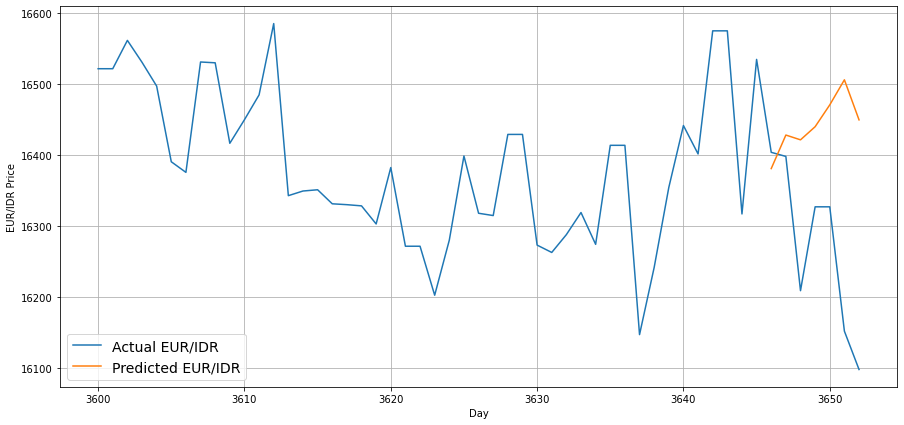

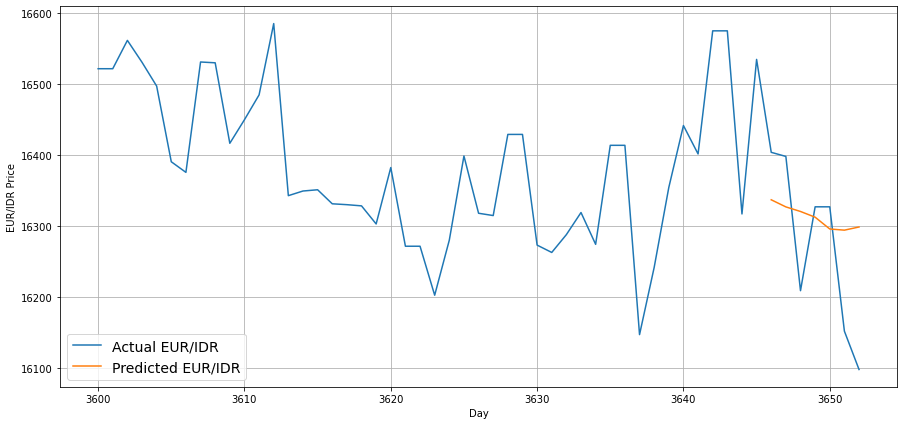

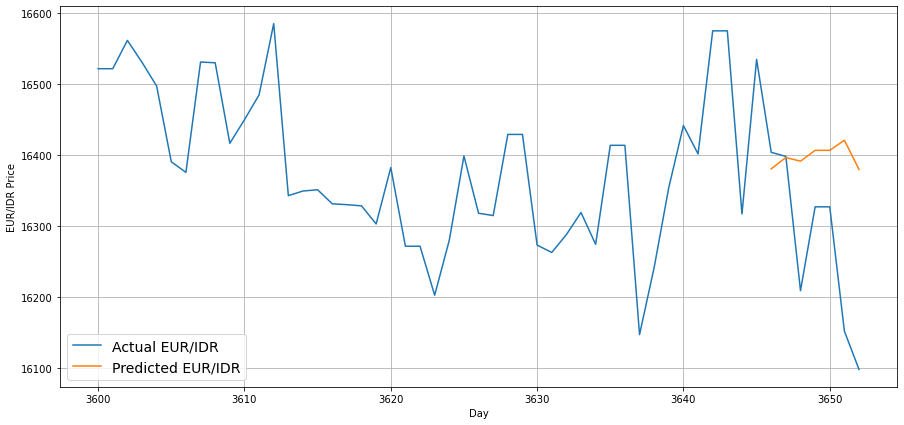

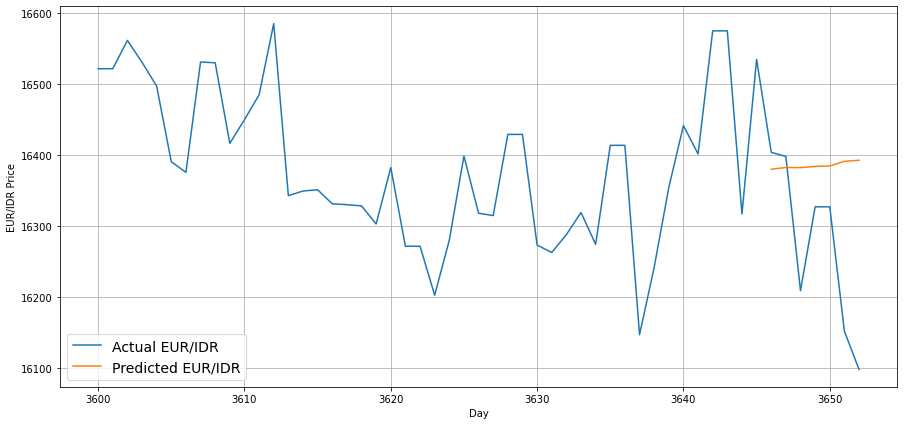

In [63]:
md = [2,21,24,25]
eva = []

for i in md:
    model = tf.keras.models.load_model(f"model_experiments/model_{i}/")
    model.evaluate(valid_set)

    into_future = 60
    future_forecast = make_future_forecast(values=series[:-into_future],
                                           model=model,
                                           into_future=into_future,
                                           window_size=window_size)
    
    plt.figure(figsize=(15, 7))
    plot_time_series(time, series, start=3600, format="-", label="Actual EUR/IDR")
    plot_time_series(time[-into_future:], future_forecast, format="-", label="Predicted EUR/IDR")

    eval_model = evaluate_predss(y_true=series[-into_future:],
                                   y_pred=future_forecast)
    
    eva.append(eval_model)

In [15]:
# Create a dictionary using the "md" list as keys and the "eva" list as values
eva_data = {str(m): e for m, e in zip(md, eva)}

# Convert the dictionary into a DataFrame
eva_results = pd.DataFrame.from_dict(eva_data, orient='index')

# Add a column for the row names
eva_results.index.name = 'md'

eva_results

,mae,mse,rmse,mape,mase
md,,,,,
2,97.994171,15740.906250,125.462769,0.598084,1.043635
21,92.922951,14309.803711,119.623589,0.567974,0.989627
24,93.680992,14433.207031,120.138283,0.573768,0.997700
25,148.450592,34773.046875,186.475327,0.904321,1.580995


In [64]:
# Create a dictionary using the "md" list as keys and the "eva" list as values
eva_data = {str(m): e for m, e in zip(md, eva)}

# Convert the dictionary into a DataFrame
eva_results = pd.DataFrame.from_dict(eva_data, orient='index')

# Add a column for the row names
eva_results.index.name = 'md'

eva_results

,mae,mse,rmse,mape,mase
md,,,,,
2,175.279999,46939.238281,216.654648,1.082400,1.940859
21,91.142578,11944.203125,109.289536,0.562228,1.009213
24,130.929550,28274.093750,168.149017,0.809008,1.449770
25,122.951866,25901.796875,160.940353,0.759916,1.361434


We will use two model

`
model_21 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(256, input_shape=[window_size], activation="relu"),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1)
], name="model_21")
`

`
model_24 = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=[window_size], activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(64, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(32, activation="relu", kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dense(1)
], name="model_24")
`